In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import combinations

In [7]:
data_path = Path('./data/transform/')
driver_df = pd.read_csv(data_path / 'driver.csv', sep='|')
car_df = pd.read_csv(data_path / 'car.csv', sep='|')

## Driver and Car Combos

Pick 5 + 1

If the purpose of the game was to pick a lineup and keep it, this analysis would show the optimal lineups so far, maximizing average points within a budget constraint.

In [10]:
driver_df['Current Price'].sum()

279.29999999999995

In [12]:
min_car_price = car_df['Current Price'].min()
max_car_price = car_df['Current Price'].max()

### All driver combos within budget range

In [13]:
combos = []
total_budget = 103


for i, index in enumerate(list(combinations(driver_df.index, 5))):
    cost = driver_df.loc[index, ['Current Price']].sum()[0]
    if cost < total_budget - min_car_price and cost > total_budget - max_car_price:
        combos.append(pd.DataFrame(driver_df.loc[index, ['last_name', 'diff_price', 'Current Price', 'avg']].sum()).T)
        
        

In [14]:
combo_df = pd.concat(combos).sort_values(by='avg', ascending=False)
combo_df[:200]

,last_name,diff_price,Current Price,avg
0,VerstappenRussellLeclercMagnussenNorris,28.833333,95.3,140.0
0,RussellPerezLeclercOconNorris,34.19,89.5,139.5
0,RussellPerezLeclercBottasNorris,37.29,86.4,139.5
0,VerstappenPerezLeclercOconNorris,27.003333,95.8,138.5
0,VerstappenPerezLeclercBottasNorris,30.103333,92.7,138.5
...,...,...,...,...
0,RussellPerezAlonsoLeclercNorris,18.451667,89.5,121.75
0,RussellPerezLeclercBottasLatifi,30.951667,77.0,121.75
0,RussellPerezLeclercTsunodaStroll,29.751667,78.2,121.75
0,VerstappenRussellLeclercStrollRicciardo,11.751667,96.2,121.75


## Driver Combos + Car

In [15]:
all_combo = combo_df.merge(car_df, how='cross', suffixes=['', '_car'])

In [16]:
all_combo

,last_name,diff_price,Current Price,avg,Team,BAH,SAU,AUS,ITA,Total,avg_car,max,median,pts_price,pts_price_med,Unnamed: 0,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car
0,VerstappenRussellLeclercMagnussenNorris,28.833333,95.3,140.0,Mercedes,57,34,64,31,186.0,46.50,64,45.5,29.093208,28.467547,0,33.8,34.5,1.38,-4.706792
1,VerstappenRussellLeclercMagnussenNorris,28.833333,95.3,140.0,Red Bull,4,62,39,99,204.0,51.00,99,50.5,31.908679,31.595849,1,32.1,32.5,1.59,-0.191321
2,VerstappenRussellLeclercMagnussenNorris,28.833333,95.3,140.0,Alpine,24,13,10,8,55.0,13.75,24,11.5,8.602830,7.195094,4,14.0,14.0,0.98,-5.397170
3,VerstappenRussellLeclercMagnussenNorris,28.833333,95.3,140.0,Ferrari,76,63,44,30,213.0,53.25,76,53.5,33.316415,33.472830,2,25.8,25.0,2.06,7.516415
4,VerstappenRussellLeclercMagnussenNorris,28.833333,95.3,140.0,AlphaTauri,10,3,8,36,57.0,14.25,36,9.0,8.915660,5.630943,6,10.1,10.5,1.41,-1.184340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71195,HamiltonAlonsoLatifiSchumacherRicciardo,-39.896667,69.6,33.5,Aston Martin,14,19,3,32,68.0,17.00,32,16.5,10.636226,10.323396,5,11.0,11.5,1.55,-0.363774
71196,HamiltonAlonsoLatifiSchumacherRicciardo,-39.896667,69.6,33.5,Alfa Romeo,31,3,24,35,93.0,23.25,35,27.5,14.546604,17.205660,7,8.3,8.0,2.80,6.246604
71197,HamiltonAlonsoLatifiSchumacherRicciardo,-39.896667,69.6,33.5,Williams,15,-1,8,17,39.0,9.75,17,11.5,6.100189,7.195094,9,6.5,7.0,1.50,-0.399811
71198,HamiltonAlonsoLatifiSchumacherRicciardo,-39.896667,69.6,33.5,Haas,27,1,13,8,49.0,12.25,27,10.5,7.664340,6.569434,8,6.7,6.0,1.83,0.964340


In [17]:
all_combo['total_diff_price'] = all_combo['diff_price'] + all_combo['diff_price_car']
all_combo['total_price'] = all_combo['Current Price'] + all_combo['Current Price_car']
all_combo['total_avg'] = all_combo['avg'] + all_combo['avg_car']

## Combos Filtered for Budget

In [18]:
all_combo_b = all_combo[all_combo['total_price'] < total_budget].sort_values(by='total_avg', ascending=False).reset_index()

In [19]:
all_combo_b.head(50)[['last_name', 'Team', 'total_avg', 'total_diff_price', 'total_price']]

,last_name,Team,total_avg,total_diff_price,total_price
0,RussellPerezLeclercBottasMagnussen,Ferrari,186.5,49.164748,102.3
1,RussellLeclercBottasMagnussenNorris,Ferrari,182.75,47.939748,100.2
2,RussellPerezLeclercStrollMagnussen,Ferrari,181.5,45.231415,101.8
3,PerezLeclercOconBottasNorris,Ferrari,181.25,46.109748,100.7
4,RussellLeclercBottasStrollNorris,Ferrari,180.0,42.701415,103.0
5,PerezLeclercOconMagnussenNorris,Ferrari,179.0,47.414748,97.4
6,RussellLeclercOconBottasMagnussen,Ferrari,178.75,47.893082,96.7
7,RussellPerezLeclercAlbonMagnussen,Ferrari,178.5,44.371415,100.0
8,RussellPerezLeclercZhouMagnussen,Ferrari,178.25,42.849748,101.3
9,RussellLeclercStrollMagnussenNorris,Ferrari,177.75,44.006415,99.7


## 5 Driver Combos

<AxesSubplot:>

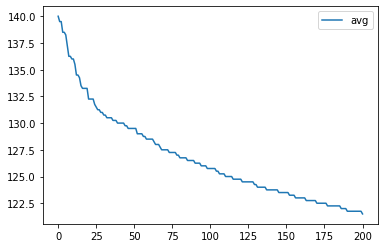

In [20]:
combo_df.sort_values(by='avg', ascending=False).reset_index().loc[0:200, ['avg']].plot()

## Five Driver + Car Combos

<AxesSubplot:>

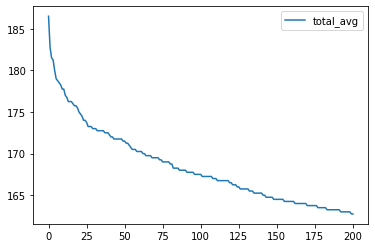

In [22]:
all_combo_b.sort_values(by='total_avg', ascending=False).reset_index().loc[0:200, ['total_avg']].plot()